# GLM MODEL

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

## Data

In [8]:
# Model 1 -> Lasso selected variables
full_train = pd.read_csv("../../data/csev/model_1/trainCSEV.csv")
full_test = pd.read_csv("../../data/csev/model_1/testCSEV.csv")

In [9]:
Y_train = full_train['C_SEV']
X_train = full_train.drop(['C_SEV'], axis=1)
Y_train.value_counts()

1    27796
0    27794
Name: C_SEV, dtype: int64

In [16]:
X_train = X_train.drop(['C_WTHR'], axis=1)

In [10]:
Y_test = full_test['C_SEV']
X_test = full_test.drop(['C_SEV'], axis=1)
Y_test.value_counts()

1    351139
0      6949
Name: C_SEV, dtype: int64

In [17]:
X_test = X_test.drop(['C_WTHR'], axis=1)

##  Random Forest Classifier

In [18]:
model = RandomForestClassifier()

In [19]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [20]:
Y_pred = model.predict(X_test)

## Evaluation

In [21]:
metrics.accuracy_score(Y_test, Y_pred)

0.7850695918321753

Matriz de confusión
[[  2958   3991]
 [ 72973 278166]]
Matriz de confusión normalizada
[[0.42567276 0.57432724]
 [0.20781799 0.79218201]]


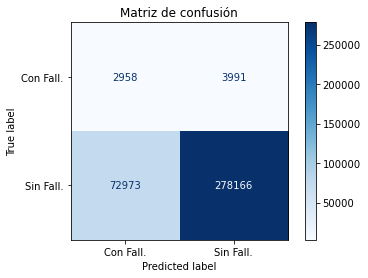

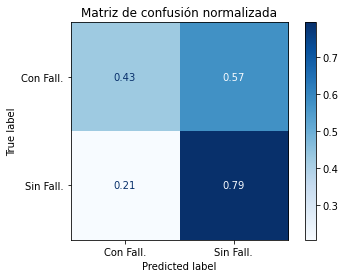

In [22]:
titles_options = [
    ("Matriz de confusión", None),
    ("Matriz de confusión normalizada", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        Y_test,
        display_labels=['Con Fall.', 'Sin Fall.'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [10]:
print("Classification Report")
print(classification_report(Y_test, Y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      6949
           1       0.98      1.00      0.99    351139

    accuracy                           0.98    358088
   macro avg       0.74      0.50      0.50    358088
weighted avg       0.97      0.98      0.97    358088

